<a href="https://colab.research.google.com/github/Praaathaamesh/DL-API-Management/blob/main/DocNotes/KerasAPI_Doc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# _**Everything About Keras API**_

- Highly productive approach to ML problems.
- Focus:- fast experimentation
- Has full access TensorFlow's cross platform abilities and scalability
- Reduces Cognitive Load, via (simple and consistent UI, less actions for common cases, clear/actionable exceptions, "start easy - master complex" philosophy, concise/readable code)

# The Sequential Model

In [7]:
# Base DS of Keras

'''
- models : simple input to output transformation
- layers : Directed Acyclic Graph of the layers
'''

# importing important libraries/packages
import tensorflow as tf
import keras
from keras import layers

## Basics of Sequential Models

In [8]:
# Creating Sequential model

'''
- Best for plain stack of the layers (each layer has one input and one output tensor)
- Layers have linear connectivity
'''

# Method 1 :- direct layers and calling them recursively

L1 = tf.keras.layers.Dense(units = 2, activation = "relu", name = "layer1" )
L2 = tf.keras.layers.Dense(units = 3, activation = "relu", name = "layer2" )
L3 = tf.keras.layers.Dense(units = 4, name = "layer3" )

Input = tf.Variable(tf.ones((3,3)))
Output = L3(L2(L1(Input)))

In [9]:
# Method 2 :- Using Sequential Constructor

SeqModel = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units = 2, activation = "relu", name = "layer1" ),
        tf.keras.layers.Dense(units = 3, activation = "relu", name = "layer2"),
        tf.keras.layers.Dense(units = 4, name = "layer3" )
    ]
)
Input = tf.Variable(tf.ones((3,3)))
Output = SeqModel(Input)

# Footnote:- Basically Sequential model has lists of layers; hence all list method applied!

In [10]:
# Method 3 :- Using add() method in Sequential Constructor

SeqModel = tf.keras.Sequential()
SeqModel.add(tf.keras.layers.Dense(units = 2, activation = "relu", name = "layer1" ))
SeqModel.add(tf.keras.layers.Dense(units = 3, activation = "relu", name = "layer2"))
SeqModel.add(tf.keras.layers.Dense(units = 4, name = "layer3" ))
Input = tf.Variable(tf.ones((3,3)))
Output = SeqModel(Input)

# Footnotes:- sequential models should NOT be used when -
if (False):
  '''
  - model has multiple input and outputs
  - any layer has multiple inputs or outputs
  - shared layers are essential in your model
  - non-linear topology (e.g. a residual connection, a multi-branch model)
  '''

In [11]:
# See the layers
SeqModel.layers

[<Dense name=layer1, built=True>,
 <Dense name=layer2, built=True>,
 <Dense name=layer3, built=True>]

##  Specifying the input shape in advance

In [12]:

# finding the weights of the model
print(SeqModel.weights, '\n')

# finding the length of the weights of the model
print(len(SeqModel.weights), '\n')

# Getting the model summary
print(SeqModel.summary())

# Footnote :- instantiating model without specifying the input shape --> it isnt built and has no weights, hence when we pass the input it get "built"

[<Variable path=sequential_5/layer1/kernel, shape=(3, 2), dtype=float32, value=[[-1.0950738  -0.01917851]
 [-0.53773135  0.11639583]
 [ 0.36602187 -0.8310013 ]]>, <Variable path=sequential_5/layer1/bias, shape=(2,), dtype=float32, value=[0. 0.]>, <Variable path=sequential_5/layer2/kernel, shape=(2, 3), dtype=float32, value=[[-0.5387395 -0.8412378 -0.8231935]
 [-0.7102716  0.6611663 -0.9528961]]>, <Variable path=sequential_5/layer2/bias, shape=(3,), dtype=float32, value=[0. 0. 0.]>, <Variable path=sequential_5/layer3/kernel, shape=(3, 4), dtype=float32, value=[[-0.08392966 -0.36269146 -0.326563    0.623929  ]
 [-0.64520943  0.29878688 -0.09461159  0.45843542]
 [ 0.5319303   0.06403434  0.3704946   0.5648713 ]]>, <Variable path=sequential_5/layer3/bias, shape=(4,), dtype=float32, value=[0. 0. 0. 0.]>] 

6 



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (3, 2)                 │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (3, 3)                 │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (3, 4)                 │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
# Hence to specify your input shape, pass it via the first layer or use add

SeqModel = tf.keras.Sequential()
SeqModel.add(tf.keras.Input(shape = (3,)))
SeqModel.add(tf.keras.layers.Dense(units = 2, activation = "relu", name ="Layer 1"))
# or use input_shape argument above

SeqModel.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer 1 (Dense)                 │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (32.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

## Example of Common Debugging Workflow

In [14]:
# Example 1 :- downsampling of the image

DownSampler =  tf.keras.Sequential()

DownSampler.add(tf.keras.Input(shape = (256, 256, 3)))

# Downsampling Cycle 1
DownSampler.add(tf.keras.layers.Conv2D(filters  = 32,
                                       kernel_size = 5,
                                       strides = 2,
                                       activation = "relu"))
DownSampler.add(tf.keras.layers.Conv2D(filters  = 32,
                                       kernel_size = 3,
                                       activation = "relu"))
DownSampler.add(tf.keras.layers.MaxPooling2D(3))


# Downsampling Cycle 2
DownSampler.add(tf.keras.layers.Conv2D(filters  = 32,
                                       kernel_size = 3,
                                       activation = "relu"))
DownSampler.add(tf.keras.layers.Conv2D(filters  = 32,
                                       kernel_size = 3,
                                       activation = "relu"))
DownSampler.add(tf.keras.layers.MaxPooling2D(3))


# Downsampling Cycle 3 we need 4 x 4 x 32
DownSampler.add(tf.keras.layers.Conv2D(filters  = 32,
                                       kernel_size = 3,
                                       activation = "relu"))
DownSampler.add(tf.keras.layers.Conv2D(filters  = 32,
                                       kernel_size = 3,
                                       activation = "relu"))
DownSampler.add(tf.keras.layers.MaxPooling2D(2))

# Apply Global Max Pooling to downsample the feature maps in 1 x 1 x 32feature map
DownSampler.add(tf.keras.layers.GlobalMaxPooling2D())
print(DownSampler.summary())

# finally can add FCL and later do training, testing and validation

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 41, 41, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 39, 39, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 37, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 32)             │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,672 (190.12 KB)

 Trainable params: 48,672 (190.12 KB)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
# Example 2 :- extraction using Sequential model

DownSampler =  tf.keras.Sequential()

DownSampler.add(tf.keras.Input(shape = (256, 256, 3)))
DownSampler.add(tf.keras.layers.Conv2D(filters  = 32,
                                       kernel_size = 5,
                                       strides = 2,
                                       activation = "relu"))
DownSampler.add(tf.keras.layers.Conv2D(filters  = 32,
                                       kernel_size = 3,
                                       activation = "relu"))

FeatureExtractor = tf.keras.Model(
    inputs = DownSampler.inputs,
    outputs = [i.output for i in DownSampler.layers]
)

x0 = tf.ones((1, 256, 256, 3))
ExtractedFeatures = FeatureExtractor(x0)

# The Functional API

In [16]:
# Introduction:

'''
- Anything that cant be done with sequential model; is done by this
- more flexible than sequential models
- these models are basically just DAG of layers
'''

InputFeatures = tf.keras.Input(shape = (784, ))

dense = tf.keras.layers.Dense(64, activation = "relu")
x0 = dense(InputFeatures)
dense2 = tf.keras.layers.Dense(64, activation = "relu")
x1 = dense2(x0)
dense3 = tf.keras.layers.Dense(10)
outputs = dense3(x1)

FunctionalAPIModel = tf.keras.Model(inputs = InputFeatures, outputs = outputs, name = "FuncModelDemo")

In [17]:
# Show summary
print(FunctionalAPIModel.summary())

Model: "FuncModelDemo"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [18]:
# show flow

# keras.utils.plot_model(FunctionalAPIModel, "FunctionalAPIModel.png", show_shapes = True)

In [19]:
# training,testing evaluation and inference work the same as Sequential API same goes for saving and serialisation

## Models and Layers properties

In [20]:
# Use the same graph of the layers to define different models

EncInp = tf.keras.Input(shape = (28,28,1))
enc_cc = tf.keras.layers.Conv2D(filters = 16, kernel_size = 3,activation = "relu")(EncInp)
enc_mp = tf.keras.layers.MaxPooling2D(2)(enc_cc)
enc_cc = tf.keras.layers.Conv2D(filters = 16, kernel_size = 2,activation = "relu")(enc_mp)
EncOut = tf.keras.layers.GlobalMaxPooling2D()(enc_cc)

EncoderModel = tf.keras.Model(EncInp, EncOut, name ="encoderModel1")


DecInp = tf.keras.layers.Reshape(target_shape = (4,4,1))(EncOut)
dec_cc = tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3,activation = "relu")(DecInp)
dec_ups = tf.keras.layers.UpSampling2D(2)(dec_cc)
dec_cc = tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3,activation = "relu")(dec_ups)
DecOut = tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3,activation = "relu")(dec_cc)

DecoderModel = tf.keras.Model(EncInp, DecOut, name ="decoderModel1")
print(DecoderModel.summary())


Model: "decoderModel1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 16)     │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 16)             │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 6, 6, 16)       │           160 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 14, 14, 16)     │         2,320 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 16, 16, 16)     │         2,320 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,000 (23.44 KB)

 Trainable params: 6,000 (23.44 KB)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
# Models are callable just like the layers

encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")


decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")


autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 16)             │        18,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │         9,569 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,241 (110.32 KB)

 Trainable params: 28,241 (110.32 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Extraneous:
if False:
  '''
  - Shared Layers: layer insatnces reused in a same model but multiple times.
    they are used to encode the inputs of the similar spaces
  - In graph of layers, one can extract and reuse any node if the want to
    Much suitable for feature extraction.
  - If the API is not sufficient one can extend it by subclassing (perviously seen use class and build use the base TensorFlow)
  - Use it when you just want to implement the model with given classes; not when you want to extend those by doing subclssing
  - advantages: less verbose, plottable and isnpectable, can be serialised or cloned,
  - disadvantages: no support to dynamic architecture (cant be used for recursive nets and tree RNNs)
  - Sequntial, subclassed, functional models all interact with each other; no usage restrictions!
  '''


In [23]:
# Example :- Implementing simple and small ResNet model

ResNetInp = tf.keras.layers.Input(shape = (32, 32, 3))

# Block 1
b1conv1 = tf.keras.layers.Conv2D(32,3, activation = "relu")(ResNetInp)
b1conv2 = tf.keras.layers.Conv2D(64,3, activation = "relu")(b1conv1)
b1Out = tf.keras.layers.MaxPooling2D(3)(b1conv2) # output of block 1

# Block 2
b2conv1 = tf.keras.layers.Conv2D(64,3, padding = "same", activation = "relu")(b1Out)
b2conv2 = tf.keras.layers.Conv2D(64,3, padding = "same", activation = "relu")(b2conv1)
b2Out =  tf.keras.layers.add([b2conv2, b1Out])# output of block 2

# Block 3
b3conv1 = tf.keras.layers.Conv2D(64,3, padding = "same", activation = "relu")(b2Out)
b3conv2 = tf.keras.layers.Conv2D(64,3, padding = "same", activation = "relu")(b3conv1)
b3Out =  tf.keras.layers.add([b3conv2, b2Out])# output of block 3

# FCL
OutConv = tf.keras.layers.Conv2D(64, 3, activation = "relu")(b3Out)
GAP = tf.keras.layers.GlobalAveragePooling2D()(OutConv)
FCL = tf.keras.layers.Dense(256, activation = "relu")(GAP)

# droput some neurons
Drop = tf.keras.layers.Dropout(0.5)(FCL)
Outputs = tf.keras.layers.Dense(10)(Drop)

Model = tf.keras.Model(ResNetInp, Outputs, name = "MiniResNetModel")
print(Model.summary())

Model: "MiniResNetModel"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 30, 30,    │        896 │ input_layer_7[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 28, 28,    │     18,496 │ conv2d_14[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 9, 9, 64)  │          0 │ conv2d_15[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 9, 9, 64)  │     36,928 │ max_pooling2d_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 9, 9, 64)  │     36,928 │ conv2d_16[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 9, 9, 64)  │          0 │ conv2d_17[0][0],  │
│                     │                   │            │ max_pooling2d_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 9, 9, 64)  │     36,928 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 9, 9, 64)  │     36,928 │ conv2d_18[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 9, 9, 64)  │          0 │ conv2d_19[0][0],  │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 7, 7, 64)  │     36,928 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ conv2d_20[0][0]   │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 256)       │     16,640 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 10)        │      2,570 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 223,242 (872.04 KB)

 Trainable params: 223,242 (872.04 KB)

 Non-trainable params: 0 (0.00 B)

None


# Training and Evaluation using built-in methods (No subclassing)

### Using NumPy array dataset (small)

In [24]:
# creating a simple functional model

inputs = tf.keras.Input(shape = (784,))
dense1 = tf.keras.layers.Dense(64, activation = "relu")(inputs)
dense2 = tf.keras.layers.Dense(64, activation = "relu")(dense1)
outputs = tf.keras.layers.Dense(10, activation= "softmax")(dense2)

SimpleFuncModel = tf.keras.Model(inputs = inputs, outputs = outputs, name = "WorkingModel")

In [25]:
# getting the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# reshaping and typecasting independant variables
x_train = x_train.reshape(60000, 784).astype("float32")/ 255
x_test = x_test.reshape(10000, 784).astype("float32")/ 255

# typecasting dependant variables
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# creating a validaiton dataset
x_val = x_train[-10000:]
y_val = y_train[-10000:]

# using remaining dataset for training the model
x_train = x_train[:-10000]
y_train = y_train[:-10000]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
# Specifying trainig configurations using SimpleFuncModel.compile()

SimpleFuncModel.compile(
    optimizer = tf.keras.optimizers.RMSprop(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy() ,
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [27]:
# footnote: in compile, arguments can be specified using string identifier
#           for usability you can implement steps into separate functions
#           custom losses can be made using functions and implemented using subclassing

In [28]:
# Training the model

SimpleFuncModel.fit(
    x_train,
    y_train,
    batch_size = 64,
    epochs = 2,
    validation_data = (x_val, y_val)
)

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5663 - sparse_categorical_accuracy: 0.8438 - val_loss: 0.1901 - val_sparse_categorical_accuracy: 0.9445
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1703 - sparse_categorical_accuracy: 0.9503 - val_loss: 0.1787 - val_sparse_categorical_accuracy: 0.9465


In [29]:
# Automatically setting apart the validation dataset

# model.fit(xt, yt, batch_size = 64, validation_split = 0.2, epochs = 1 )

In [30]:
# Evaluating the training

EvalResults = SimpleFuncModel.evaluate(
    x_test,
    y_test,
    batch_size = 128
)

print("Following are the model evaluation results: \n")
print(EvalResults)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1937 - sparse_categorical_accuracy: 0.9387
Following are the model evaluation results: 

[0.18080802261829376, 0.9430000185966492]


### tf.data datasets (Big)

In [31]:
# create reusable model

def uncompModel():
  inputs = tf.keras.Input(shape = (784,))
  dense1 = tf.keras.layers.Dense(64, activation = "relu")(inputs)
  dense2 = tf.keras.layers.Dense(64, activation = "relu")(dense1)
  outputs = tf.keras.layers.Dense(10, activation= "softmax")(dense2)

  SimpleFuncModel = tf.keras.Model(inputs = inputs, outputs = outputs, name = "WorkingModel")
  return SimpleFuncModel

def compModel():
  compiled_model = uncompModel()
  compiled_model.compile(
    optimizer = tf.keras.optimizers.RMSprop(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy() ,
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
  )
  return compiled_model
  # footnote:- Can be used again and again

In [32]:
# create, train, evaluate the dataset instance

trail_model = compModel()

# create the training dataset instance (use np array data for now)
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# shuffle it
train_data = train_data.shuffle(buffer_size = 1024).batch(64)

# create testing dataset
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_data = test_data.batch(64)

# train the model
trail_model.fit(train_data, epochs = 3)

# evaluate the model
eval_results = trail_model.evaluate(test_data)
dict(zip(trail_model.metrics_names, eval_results))

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.5671 - sparse_categorical_accuracy: 0.8395
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1655 - sparse_categorical_accuracy: 0.9523
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1163 - sparse_categorical_accuracy: 0.9648
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1336 - sparse_categorical_accuracy: 0.9600


{'loss': 0.11946418136358261, 'compile_metrics': 0.964900016784668}

In [33]:
trail_model.fit(train_data, epochs=3, steps_per_epoch=100)

# Footnote:- using only 100 batches per epoch, 6400 samples

Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0974 - sparse_categorical_accuracy: 0.9709
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0998 - sparse_categorical_accuracy: 0.9725
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0879 - sparse_categorical_accuracy: 0.9707


In [34]:
# creating validation dataset and validating the model performance

val_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_data = val_data.batch(64)

trail_model.fit(train_data,
                epochs=1,
                validation_data=val_data)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0770 - sparse_categorical_accuracy: 0.9769 - val_loss: 0.1056 - val_sparse_categorical_accuracy: 0.9685


### Sample and class weighing

In [35]:
'''
- weights of samples depends on the frequency of the data
- These are the two methods (class and sample weights)
'''

# CLASS WEIGHTS

# pass as an argument in fit method
import numpy as np

class_weight = {
    0 : 1.0,
    1 : 1.0,
    2 : 1.0,
    3 : 1.0,
    4 : 1.0,
    5 : 2.0,
    6 : 1.0,
    7 : 1.0,
    8 : 1.0,
    9 : 1.0,
}

trail_model = compModel()
trail_model.fit(x_train, y_train, class_weight=class_weight, batch_size=64, epochs = 1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6335 - sparse_categorical_accuracy: 0.8401


In [36]:
# SAMPLE WEIGHTS

'''
- Use for in-depth control or if the model is classifier
- pass sample-weight argument in fit method (for NumPy array data)
- use (input_batch, label_batch, sample_weight_batch) tuples (for any other data)
- An array specifying how much weight each sample in a batch should have while computing total loss
- if weights are binary then use these as masks for the loss fucntion
'''

sample_weight = np.ones(shape = (len(y_train)))
sample_weight[y_train == 5] = 2.0

trail_model = compModel()
trail_model.fit(x_train, y_train, sample_weight = sample_weight, batch_size=64, epochs = 1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6488 - sparse_categorical_accuracy: 0.8280


### Passing data to multi-input/Output model

In [37]:
# Example Case:

'''
Consider the following model,
which has an image input of shape (32, 32, 3) (that's (height, width, channels))
and a time series input of shape (None, 10) (that's (timesteps, features)).
Our model will have two outputs computed from the combination of these inputs:
a "score" (of shape (1,)) and a probability distribution over five classes (of shape (5,)).

optimiser as rms (1e-3)
loss as MSE for score and categorical cross entropy for class
metrics as MAPE, MAE for score and categorical accuracy
fitting 32per batch and do one epoch

'''

# create a model with two inputs and conact them

img_inp = tf.keras.Input(shape = (32, 32, 3))
ts_inp = tf.keras.Input(shape = (None, 10))

# batch 1 image
img_conv = tf.keras.layers.Conv2D(3,3)(img_inp)
img_gmp = tf.keras.layers.GlobalMaxPooling2D()(img_conv)

# batch 2 ts
ts_conv = tf.keras.layers.Conv1D(3,3)(ts_inp)
ts_gmp = tf.keras.layers.GlobalMaxPooling1D()(ts_conv)

# concat outputs as one
concat = tf.keras.layers.concatenate([img_gmp, ts_gmp])

# output dense layer
img_out = tf.keras.layers.Dense(1)(concat)
ts_out = tf.keras.layers.Dense(5)(concat)

# specifying the model
ExModel = tf.keras.Model([img_inp, ts_inp], [img_out, ts_out])


# compiling the essentials
ExModel.compile(
    optimizer = tf.keras.optimizers.RMSprop(1e-3),
    loss = [tf.keras.losses.MeanSquaredError(), tf.keras.losses.CategoricalCrossentropy()],
    metrics = [
        [tf.keras.metrics.MeanAbsolutePercentageError(),
         tf.keras.metrics.MeanAbsoluteError()],
        [tf.keras.metrics.CategoricalAccuracy()]
    ]

)

# specify input dummy random data
img_data = np.random.random_sample(size = (100,32,32,3))
ts_data = np.random.random_sample(size = (100,20,10))
score_tar = np.random.random_sample(size = (100,1))
class_tar = np.random.random_sample(size = (100,5))

# fitting the models
ExModel.fit(
    [img_data, ts_data],
    [score_tar, class_tar],
    batch_size = 32,
    epochs = 1
)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - dense_21_loss: 0.4182 - dense_21_mean_absolute_error: 0.5366 - dense_21_mean_absolute_percentage_error: 172.8528 - dense_22_categorical_accuracy: 0.1946 - dense_22_loss: 8.5470 - loss: 9.2878


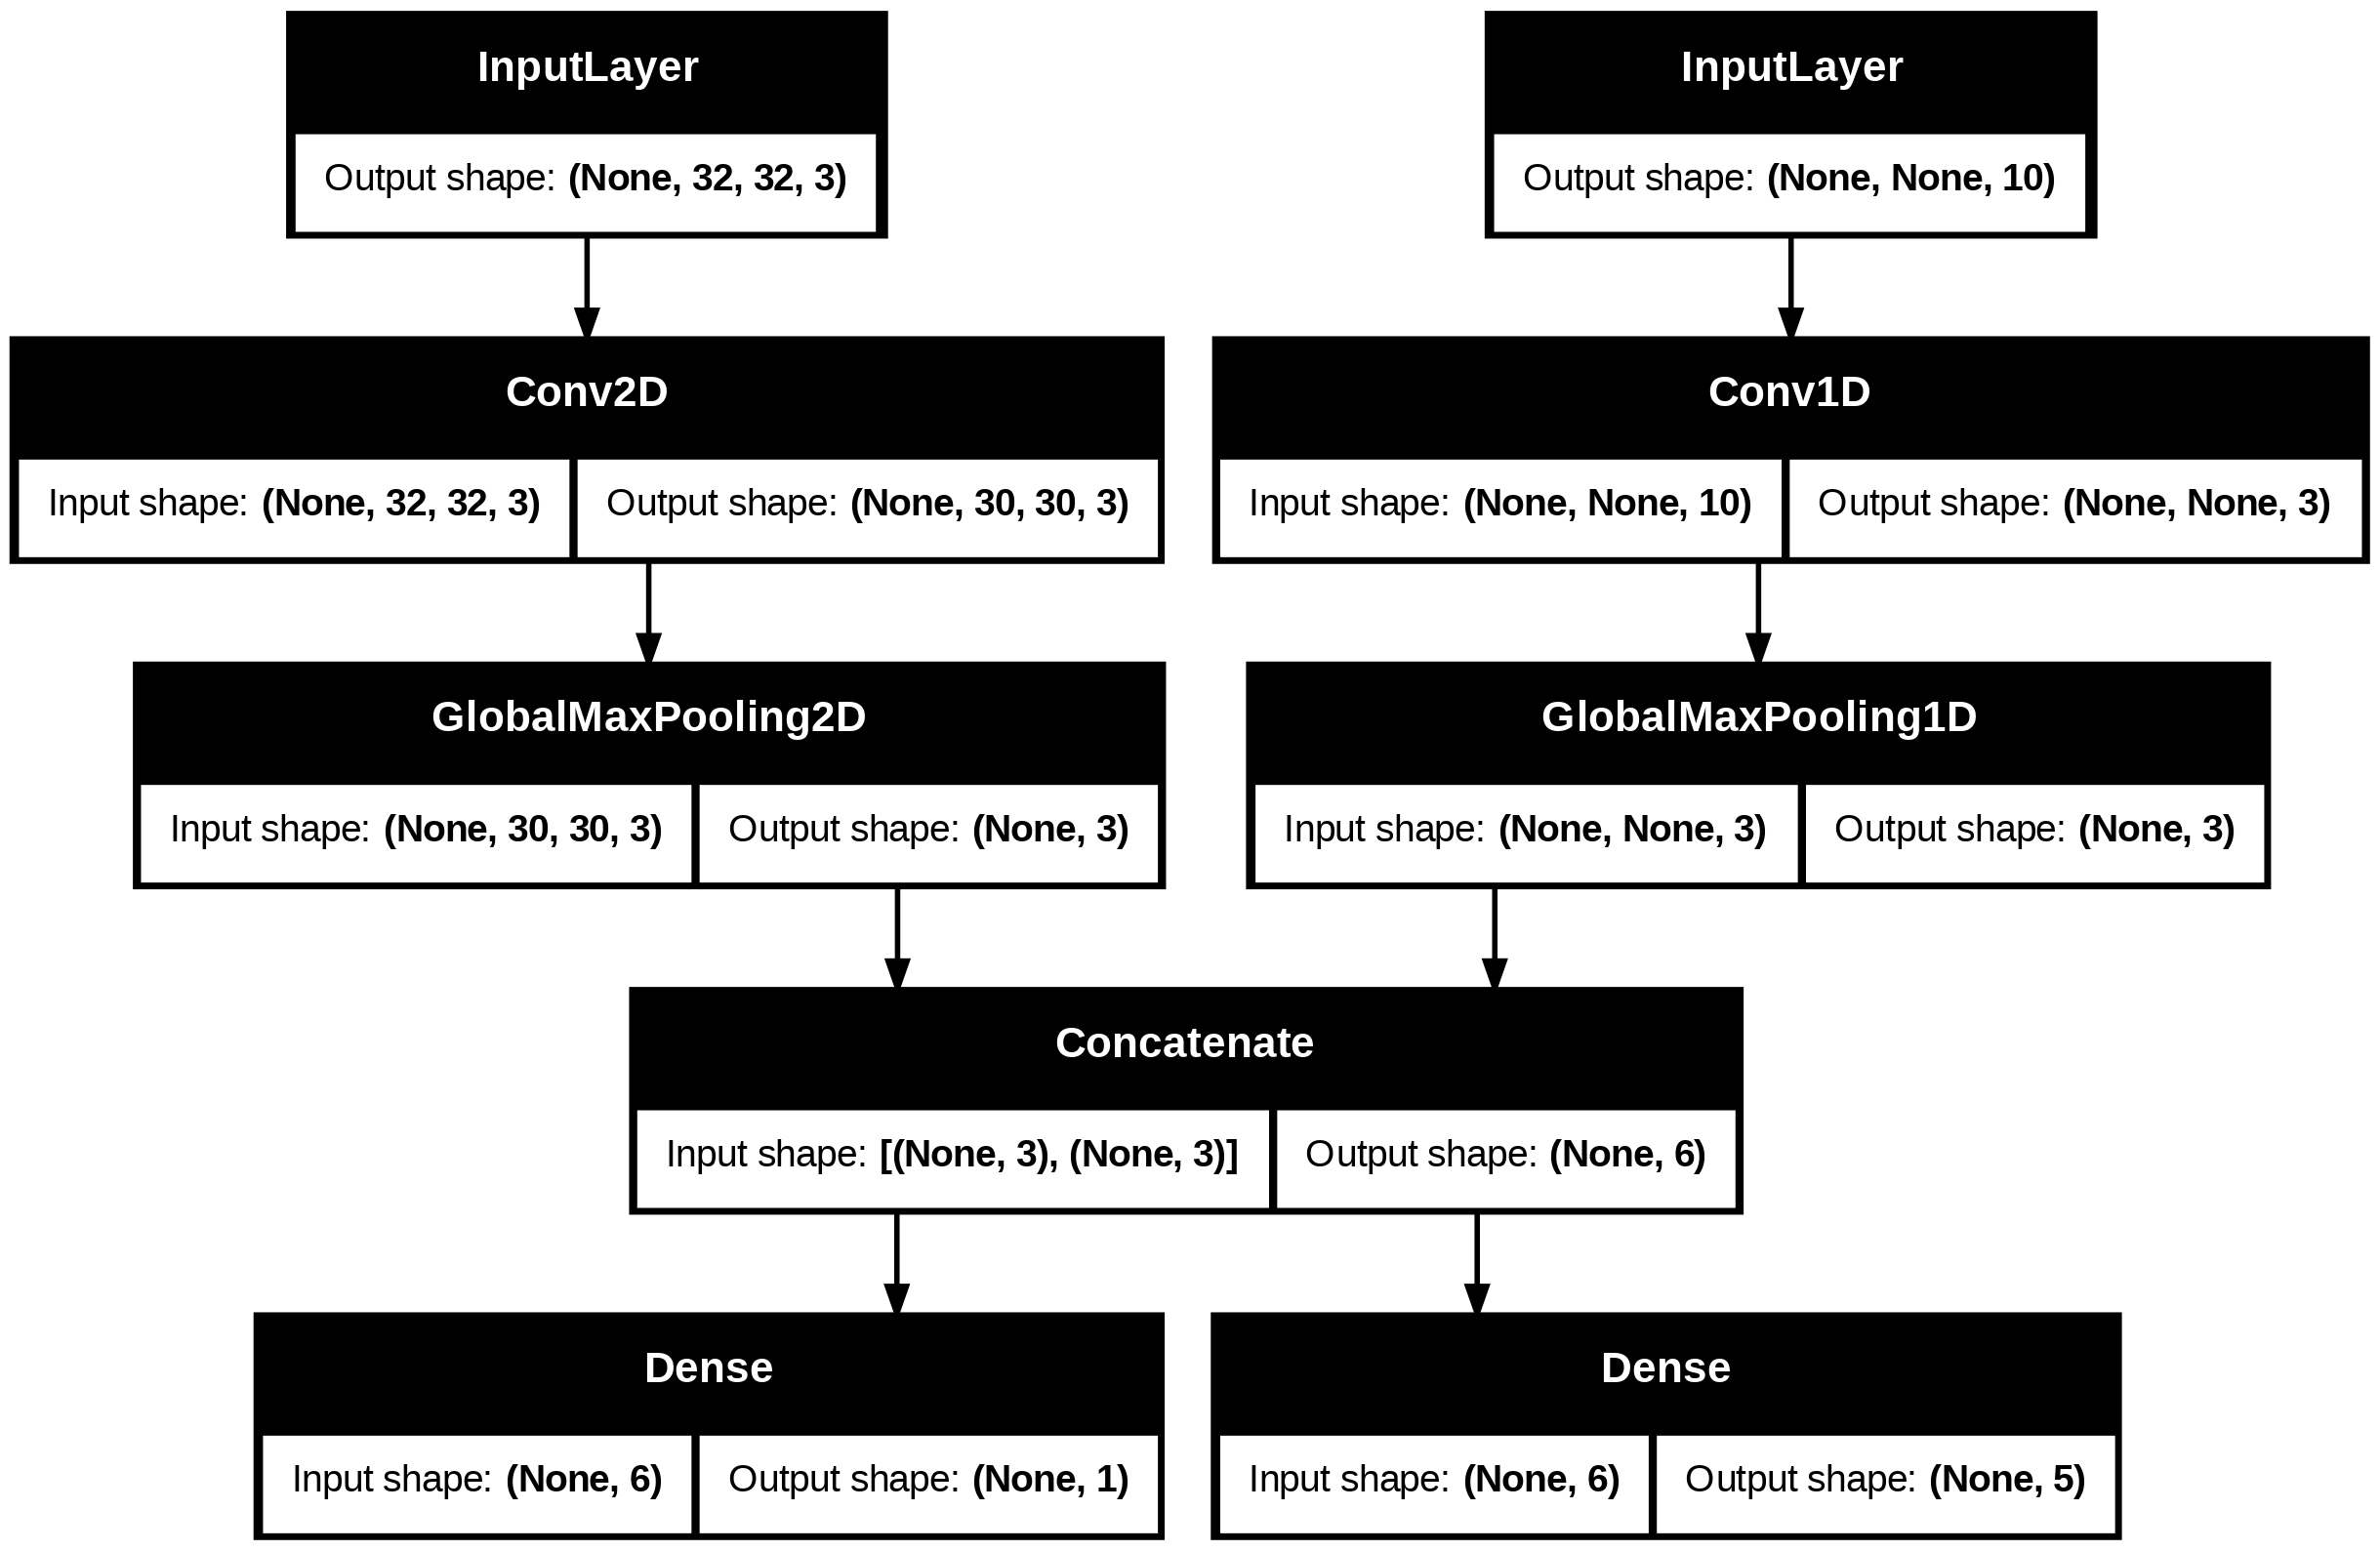

In [38]:
tf.keras.utils.plot_model(ExModel, "ExModel.png", show_shapes = True)

### Using Callbacks

In [39]:
# Introduction

'''
- called at different times of training to implement certain behaviours
- val at different points of training, regular chcekpointing, training is plateuing --> change the learning rate or fine tune the top layers
  , when a certain performance threshold is exceeded
- pass callbacks as list in a fit method
'''

if False:
  '''
  callbacks = [
    tf.keras.callbacks.EarlyStopping(
        patience = 2, # number of epochs with no improvement after which training will be stopped
        min_delta = 1e-2, # minimum change in the monitored quantity to qualify as an improvement
        verbose = 1,
        monitor = val_loss # stop the training when this quantity is no longer improving
  ]


  ExModel.fit(
    [img_data, ts_data],
    [score_tar, class_tar],
    epochs = 10,
    callbacks = callbacks
  )
  '''

# footnotes: exampeles of built-in callbacks:
#    - ModelCheckpoint :- periodic model saving, implement fault-tolerance(if training is inturrupted- restart from the last saved state)
#    - EarlyStopping - stop train when val metric no longer improves
#    - TensorBoard - periodic writig of model logs whicha re visualisable
#    - CSVLogger - loss and metric data into CSV
#    - ReduceLROnPlateau - implementing dynamic learning rate schedule

In [40]:
# Writing your own callback (by subclassing tf.keras.callbacks.Callback)

# to list per-batch loss value use pre-existing methods

class LossPerbatch(tf.keras.callbacks.Callback):
  def on_train_begin(self, logs):
    self.per_batch_losses = [] # create an empty list

  def on_batch_end(self, batch, logs):
    self.per_batch_losses.append(logs.get("loss")) # append those loss ogs into that list

### Using Learning Rate Schedules

In [41]:
# Learning rate decay:- with training, learning decreases
# Learning rate scheduling:- Model automatically adjusting the learning rate,
#                            overtime, according to a predefined plan (static)
#                            OR responding to current bechaviour like val loss (dynamic)

# usually passed as an argument to specific optimizer method

LrInitial = 0.1
# static LR scheduling
ScheduledLR = tf.keras.optimizers.schedules.ExponentialDecay(
    LrInitial,
    decay_steps = 100000,
    decay_rate = 0.96,
    staircase = True
)
# implementing
optimiser = tf.keras.optimizers.RMSprop(learning_rate=ScheduledLR)


# Footnotes:- Scheduling methods:- exponential, pieceewiseconstant, polynomial, inversetime Decays


### Visualising loss and metrics during training

In [42]:
# best:- TensorBoard
# another best:- TensorBoard callback with Keras in fit method

# New layers/models using subclassing

## Layer class: combo of weigths and forward passes

In [43]:
# Introduction

'''
- the central abstraction of Keras: Layer class
- contains all teh states (layer weights) and transformations (forward passes)

'''

class simpleDense(tf.keras.layers.Layer):
  def __init__(self, units = 32, inp_dim = 32):
    super().__init__()
    self.weight = self.add_weight(shape = (inp_dim, units), initializer = "random_normal", trainable = True)
    self.bias = self.add_weight(shape = (units, ), initializer = "zeros", trainable = True)

  def call(self, inp):
    return tf.matmul(inp, self.weight) + self.bias

x_inp = tf.ones(shape=(2,2))
SetsimpleDense = simpleDense(4, 2)
results = SetsimpleDense(x_inp)
print(results)


# Footnotes:- make some weights non-trainable hence backpropagation won't consider them

tf.Tensor(
[[ 0.02082514  0.15020159 -0.00730612 -0.0590146 ]
 [ 0.02082514  0.15020159 -0.00730612 -0.0590146 ]], shape=(2, 4), dtype=float32)


In [44]:
# Postpone weight creation till you know the shape of input

class simpleDense(tf.keras.layers.Layer):
  def __init__(self, units = 32):
    super().__init__()
    self.units = units

  def build(self, input_shape):
    self.w = self.add_weight(shape = (input_shape[-1], self.units),
                                   initializer = "random_normal",
                                   trainable = True)
    self.b = self.add_weight(shape = (self.units,),
                                   initializer = "random_normal",
                                   trainable = True)
  def call(self, inputs):
    return(tf.matmul(inputs, self.w) + self.b)


SetsimpleDense = simpleDense(32)
results = SetsimpleDense(x_inp)

print(results)

tf.Tensor(
[[-0.06801155 -0.01048956 -0.05048857  0.03016607 -0.03913376  0.01962008
   0.08860116 -0.01740664 -0.00786266 -0.09092177 -0.1007558  -0.05476945
  -0.12928678  0.06804866  0.02149832 -0.13016951  0.10439904 -0.08561708
   0.00669563 -0.08243468 -0.03514177  0.07218873  0.10111548  0.19072938
   0.10119054 -0.08310227  0.05072941  0.02694544 -0.14859465  0.11221069
   0.04503174  0.02135313]
 [-0.06801155 -0.01048956 -0.05048857  0.03016607 -0.03913376  0.01962008
   0.08860116 -0.01740664 -0.00786266 -0.09092177 -0.1007558  -0.05476945
  -0.12928678  0.06804866  0.02149832 -0.13016951  0.10439904 -0.08561708
   0.00669563 -0.08243468 -0.03514177  0.07218873  0.10111548  0.19072938
   0.10119054 -0.08310227  0.05072941  0.02694544 -0.14859465  0.11221069
   0.04503174  0.02135313]], shape=(2, 32), dtype=float32)


## Layers are recursively composable

In [45]:
class SetMLP(tf.keras.layers.Layer):
  def __init__(self):
    super().__init__()
    self.layer1 = simpleDense(32)
    self.layer2 = simpleDense(32)
    self.layer3 = simpleDense(1)

  def call(self, inputs):
    x = self.layer1(inputs)
    act1 = tf.nn.relu(x)
    x = self.layer2(act1)
    act2 = tf.nn.relu(x)
    return self.layer3(act2)

mlpModel = SetMLP()
x_inp = tf.ones((3, 64))
results  = mlpModel(x_inp)
print(results)

tf.Tensor(
[[0.00389413]
 [0.00389413]
 [0.00389413]], shape=(3, 1), dtype=float32)


## The `add_loss()` method

In [46]:
# learn regularisation first, with bias-variance tradeoff
# you can track the regularisation loss using add_loss() method.
# Later try learning autoencoders related concepts

# total loss = original loss + (regu.rate x regularisation loss)


class ReguLayer(tf.keras.layers.Layer):
  def __init__(self, rate = 1e-2):
    super().__init__()
    self.rate = rate

  def call(self, inputs):
    self.add_loss(self.rate * tf.reduce_mean(inputs))
    return inputs

class OuterLayer(tf.keras.layers.Layer):
  def __init__(self):
    super().__init__()
    self.activity_reg = ReguLayer(1e-2)

  def call(self, inputs):
    return self.activity_reg(inputs)

MainLayer = OuterLayer()

## Privileged `training` argument in the `call()` method

In [47]:
# useful in BatchNormalisation and dropout layers.

class CustomDropOut(tf.keras.layers.Layer):
  def __init__(self, rate, **kwargs):
    super().__init__(**kwargs)
    self.rate = rate # rate of neuron dropout

  def call(self, inputs, training = None):
    if training:
      return tf.nn.dropout(inputs, rate = self.rate)
    return inputs

# Saving, Serialising and exporting

## Saving

In [48]:
# Let us first create a demo model using subclassing

class DemoModel(tf.keras.layers.Layer):
  def __init__(self, units, **kwargs):
    super().__init__(**kwargs)
    self.units = units

  def build(self, input_shape):
    self.w = self.add_weight(shape = (input_shape[-1], self.units),
                                   initializer = "random_normal",
                                   trainable = True)
    self.b = self.add_weight(shape = (self.units,),
                                   initializer = "random_normal",
                                   trainable = True)

  def call(self, inputs):
    CalcResult = tf.matmul(inputs, self.w) + self.b
    return (tf.nn.relu(CalcResult))

SetDemoModel = DemoModel(32)
Results = SetDemoModel(tf.ones(shape = (2,2)))
print(Results)

tf.Tensor(
[[0.         0.         0.         0.01557462 0.09037458 0.0218
  0.12333934 0.         0.         0.         0.         0.14503303
  0.06744288 0.06438977 0.05016486 0.         0.06849996 0.
  0.         0.01982888 0.07389002 0.         0.12099806 0.06728625
  0.11077322 0.         0.         0.         0.         0.
  0.         0.10905038]
 [0.         0.         0.         0.01557462 0.09037458 0.0218
  0.12333934 0.         0.         0.         0.         0.14503303
  0.06744288 0.06438977 0.05016486 0.         0.06849996 0.
  0.         0.01982888 0.07389002 0.         0.12099806 0.06728625
  0.11077322 0.         0.         0.         0.         0.
  0.         0.10905038]], shape=(2, 32), dtype=float32)


In [49]:
# save the model
if False:
  '''
  SetDemoModel.save("my_model.keras")
  you can also pass save_format argument to save model in different formats
  '''

# Loading back the model
if False:
  '''
  reconstructed_model = tf.keras.models.load_model("my_model.keras")
  '''

In [50]:
# Introduction

if False:
  '''
  - keras model has many components: architecture and their connections, set of weigths (states), compiled data (optimser, losses and metrics)
  - keras zip save archieve has json config file (configuration of models, layers and trackables) and a metadata file, h5 state files
  - for a model with custom objects (subclassed layers), define get_config() method
  - if arguments passed to the constructor are not python objects, serialise them using get_config()
  '''

In [51]:
# Registering custom object (the best way!)

# default registering name is "Custom", you can change it using package argument
@keras.saving.register_keras_serializable(package = "CustomPackage")
class CustomPackage(tf.keras.layers.Layer):
  def __init__(self, units, **kwargs):
    super().__init__(**kwargs)
    self.units = units

  def call(self, x):
    return (x * self.units)

  def get_config(self):
    return self.units

@keras.saving.register_keras_serializable(package = "CustomActFunc", name = "CustomFunc")
def CustomFunc(x):
  return (x ** 2)

# Resuable fucntion to create a model
def ReuseModel():
  inputs = tf.keras.Input(shape = (4,))
  Layer1 = CustomPackage(6)(inputs)
  Output  = tf.keras.layers.Dense(1, activation = CustomFunc)(Layer1)
  model = tf.keras.Model(inputs, Output)
  model.compile(optimizer = tf.keras.optimizers.RMSprop(),
                loss = tf.keras.losses.MeanSquaredError())
  return model

# Reusable fucntion to train a model
def ReuseTrain(model):
  input = np.random.random((4,4))
  target = np.random.random((4,1))
  model.fit(input, target)
  return model

# Setting the model
CustomModel = ReuseModel()
CustomModel = ReuseTrain(CustomModel)
# CustomModel.save("CustomModel.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - loss: 159.9399


## Serialisation

In [52]:
if False:

  '''
  - Saving model's comfigurations only; not the models
  - tf.keras.clone_model(model): randomly initialised copy of the model
  - tf.keras.models.model_from_json(json_config) OR tf.keras.models.to_json(model): recreate model as JSON string from its config
  - tf.keras.saving.serialize_keras_object(model): get config of any arbitrary keras object
  - tf.keras.saving.deserialize_keras_object(config, custom_objects = None): recreate object from its configuration
  '''

## Exporting

In [53]:
if False:

  '''
  - model.export(): Creating lightweight version of your saved model's artifact for interference
  - artifact.serve(): calling exported artifact's forward pass
  - model.export.ExportArchive(): lower level API for custom serving endpoints, internally used by the model.export() method
  '''

# Working with pre-processing layers

## Begin the basics

In [54]:
# Introduction
if False:
  '''
  - can be used as independant preprocessing code for input processing pipelines; even if they are not native
  - enable end-to-end models created -- they accept the raw data and export a complete model
  - text/img/numerical features preprocessing and image data augmentation
  '''

In [55]:
# Numeric Normalisation

ArrayData = np.array(
    [[2.3,5.6,7.9],
    [2.2,4.7,8.9],
    [4.4,6.8,7.0]]
)

preprocessing_layer = tf.keras.layers.Normalization() # mean 0 and std 1
preprocessing_layer.adapt(ArrayData)

print(preprocessing_layer(ArrayData).numpy().std())

1.0


In [56]:
# text vectorisation

TextData = [
    "ξεῖν᾽, ἦ τοι μὲν ὄνειροι ἀμήχανοι ἀκριτόμυθοι",
    "γίγνοντ᾽, οὐδέ τι πάντα τελείεται ἀνθρώποισι.",
    "δοιαὶ γάρ τε πύλαι ἀμενηνῶν εἰσὶν ὀνείρων:",
    "αἱ μὲν γὰρ κεράεσσι τετεύχαται, αἱ δ᾽ ἐλέφαντι:",
    "τῶν οἳ μέν κ᾽ ἔλθωσι διὰ πριστοῦ ἐλέφαντος,",
    "οἵ ῥ᾽ ἐλεφαίρονται, ἔπε᾽ ἀκράαντα φέροντες:",
    "οἱ δὲ διὰ ξεστῶν κεράων ἔλθωσι θύραζε,",
    "οἵ ῥ᾽ ἔτυμα κραίνουσι, βροτῶν ὅτε κέν τις ἴδηται.",
]

preprocessing_layer_txt = tf.keras.layers.TextVectorization() # text to num
preprocessing_layer_txt.adapt(TextData)
print(preprocessing_layer_txt(TextData))

tf.Tensor(
[[37 12 25  5  9 20 21  0  0]
 [51 34 27 33 29 18  0  0  0]
 [49 52 30 31 19 46 10  0  0]
 [ 7  5 50 43 28  7 47 17  0]
 [24 35 39 40  3  6 32 16  0]
 [ 4  2 15 14 22 23  0  0  0]
 [36 48  6 38 42  3 45  0  0]
 [ 4  2 13 41 53  8 44 26 11]], shape=(8, 9), dtype=int64)


In [57]:
# perform the string lookup

VocabDict = ['v','a','d','f','e']

CharData = tf.constant([['a','d','i',],['e','f','w']])
preprocesssing_layer_strlook = tf.keras.layers.StringLookup(vocabulary = VocabDict)
# no adapt here -- returns the tensor with same shape as the input data
# each integer element of the resulting tensors represents the indices of the elements present in the original dictionary
print(preprocesssing_layer_strlook(CharData))


tf.Tensor(
[[2 3 0]
 [5 4 0]], shape=(2, 3), dtype=int64)


## Pre-processing of the input (before instantiating or inside the model)

In [58]:
# Method 1:- do it while instantiating the model
# Method 2:- do it to your tf.data.Dataset (to obtain the batches of preprocesed data) start with using the lambda function

# benefits of doing the preprocessing inside the model during the inference time:
'''
- makes the model more portable
- helps reducing the training/serving skew
'''

'\n- makes the model more portable\n- helps reducing the training/serving skew\n'

## Pre-processing during multi-worker training

In [59]:
# suitable with tf.Distribute API for running and training across multiple machines

if False:
  '''
  with tf.distribute.Strategy.scope():
    inputs = tf.keras.Input(shape = input_shape)
    preprocessing_layer = tf.keras.layers.Hashing(10)
    Dense_Layer = tf.keras.layers.Dense(16)
  '''

## Working With RNNs

- RNNs are basically used for times series and natural language processing
- **Systematically it uses `for` loop to iterate over timesteps of the sequences -- mainintaining the inner-state which encodes the informations regarding the timestep it has been so far**
- Easy to use; simple schematics; simple customisations (custom RNN cell, custom behaviour which can be used with generic RNN layer)


In [60]:
# setting up imp packages
import tensorflow as tf
import numpy as np

### Built-in RNN layers

- There are three built in layers of RNN which can be used with **Sequential layers (made using sequential API)**
  - SimpleRNN (Fully Connected RNN, previous timestamp outputs are fed to next tiemstamps)
  - GRU
  - LSTM
- Features:
  - Support recurrent dropout `recurrent_dropout`, `dropout`
  - process inputs in the reverse `go_backwards`
  - Loop unrolling (you `for` have loop --> it has 99 iterations --> it has body of 3 lines --> **if the body is copied for 89 times in the for loop --> iterations count will be reduced --> _Loop unrolled 89 times_** ) using `unroll` argument


In [64]:
# Sequential model using LSTM

# Task:
'''
make a model capable of creating 64-dimensional vector
form each embedded 1000 integers
later the vector is processed via LSTM layer
'''

model = tf.keras.Sequential() # creating a model instance
# adding layers to the models
model.add(tf.keras.layers.Embedding(input_dim = 1000, output_dim = 64))
model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.Dense(10))

# outputing summary
model.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Outputs and states

- **default output** is single vector per sample
- shape of that output is `(batch_size, units)`. Here, `units`are arguments passed to layer's constructor
- **Sequence output** can also be obtained i.e., one vector per timestamp per sample. Just use the argument `return_sequences = True` and shape of the output will be `(batch_size, timestamps, units)`


In [65]:
# Task: Define units in each layer and observe the shape

Parser = tf.keras.Sequential()

Parser.add(tf.keras.layers.Embedding(input_dim = 1000, output_dim=64))
Parser.add(tf.keras.layers.GRU(256, return_sequences = True))
Parser.add(tf.keras.layers.SimpleRNN(128))
Parser.add(tf.keras.layers.Dense(10))

Parser.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

- Another important feature:
  - LSTM has 2 internal state tensors, GRU has 1
  - A RNN layer can return a final state and which can be used for:
    - resume the next execution
    - initialise another model
    - used in **encoder-decoder seq to seq models _(final encoder state used as initial decoder state)_**
  - can specify the internal states of encoder as input to RNN layer
  
- Unlike RNN layers. **RNN cells** process one single timestamp
- RNN cell cannot process the batches of sequences
- _but_
  - `RNN(LSTMCell(10)) == LSTM(10)`
- Examples of Built-in RNN cells:
  - SimpleRNNCell
  - GRUCell
  - LSTMCell


In [66]:
# encoder-decoder seq to seq model

# Task:
'''
use functional API
to make encoder-decoder seq to seq model
use return_states and initial_state arguments
'''

EncVocab = 1000
DecVocab = 2000

# Defining the encoder layers
EncInp = tf.keras.layers.Input(shape = (None,))
EncEmb = tf.keras.layers.Embedding(input_dim= EncVocab, output_dim=64)(EncInp)
EncOut, state_a, state_b = tf.keras.layers.LSTM(64, return_state=True)(EncEmb) # REMEMBER: LSTM has 2 internal states

# Collecting or listing states
EncStates = [state_a, state_b]

# Defining the decoder layers
DecInp = tf.keras.layers.Input(shape = (None,))
DecEmb = tf.keras.layers.Embedding(input_dim = DecVocab, output_dim=64)(DecInp)
DecOut = tf.keras.layers.LSTM(64)(DecEmb, initial_state = EncStates) # REMEMBER: LSTM has 2 internal states

# Final dense layer
OUT = tf.keras.layers.Dense(10)(DecOut)

# Defining the model
Model = tf.keras.Model([EncInp, DecInp], OUT)
Model.summary()


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_16      │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_9         │ (None, None, 64)  │     64,000 │ input_layer_15[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_10        │ (None, None, 64)  │    128,000 │ input_layer_16[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ [(None, 64),      │     33,024 │ embedding_9[0][0] │
│                     │ (None, 64),       │            │                   │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ (None, 64)        │     33,024 │ embedding_10[0][… │
│                     │                   │            │ lstm_5[0][1],     │
│                     │                   │            │ lstm_5[0][2]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 10)        │        650 │ lstm_6[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 258,698 (1010.54 KB)

 Trainable params: 258,698 (1010.54 KB)

 Non-trainable params: 0 (0.00 B)

### Cross Batch Statefulness

- Use it to process very long, even infinite sequences
- Normally internal state resets every time it sees a new batch (Every sample seen is independant of the past)
- hence maintains the state of current layer
- then do convert one long seq -> many short seqs
- hence no layer resetting and retains the information of entirety of the seq

- do that by keeping the `stateful = True`

In [70]:
# Task:
'''
Use stateful LSTM layer
to process 3 paragraphs one long text
'''

para1 = np.random.random((2,10,5))
para2 = np.random.random((2,10,5))
para3 = np.random.random((2,10,5))

processing_layer = tf.keras.layers.LSTM(64, stateful = True)
Out = processing_layer(para1)
Out = processing_layer(para2)
Out = processing_layer(para3)

# Resetting the states to the original states
processing_layer.reset_states()

### RNN State Reuse

- states are not often included in weights
- to retrieve `layer.states` and - to reuse using Keras _functional API and subclassing_ as initial state of a new layer `new_layer(inputs, initial_state = layer.state)`
- **No sequential layers here, since they only support one single input and output**

In [71]:
# Task:
'''
Use stateful LSTM layer
to process 3 paragraphs one long text
and retrieve and reuse the layer state as
some other layer's initial state
'''

para1 = np.random.random((2,10,5)).astype(np.float32)
para2 = np.random.random((2,10,5)).astype(np.float32)
para3 = np.random.random((2,10,5)).astype(np.float32)

processing_layer = tf.keras.layers.LSTM(64, stateful = True)
Out = processing_layer(para1)
Out = processing_layer(para2)

# Retrieve layer state for now
Exist_State = processing_layer.states

# creating new layer
New_Processing_Layer = tf.keras.layers.LSTM(64)

# using the retireved state here
NewOut = New_Processing_Layer(para3, initial_state = Exist_State)

# Resetting the states to the original states
processing_layer.reset_states()

### Bidirectional RNN

- useful for text data, time sequences are processed from start to end and backwards too
- Like **predicting next word in the sentence requires the context of all the words which came before**
- Provided API `tf.keras.layers.Bidirectional`
- Output of this layer = forward layer output + backwards layer output

In [73]:
# Task:
'''
Create a Sequential model with 2 bidirectional layers
choose any two RNN layers here
'''
BidirModel = tf.keras.Sequential()

BidirModel.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True), input_shape = (5,10)))
BidirModel.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
BidirModel.add(tf.keras.layers.Dense(10))

BidirModel.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 5, 128)         │        38,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,266 (313.54 KB)

 Trainable params: 80,266 (313.54 KB)

 Non-trainable params: 0 (0.00 B)

### RNNs with list/dict OR nested inputs

- any use of iterator or nested structure ensure alot of data in single timestep
- for instance:
input with information about pressure and location
`
[
  batch,
  Timesteps,
  {
    "location" : [x,y],
    "pressure" : 23
  }
]
`
